In [6]:
import numpy as np
import pandas as pd

In [117]:
from catboost import CatBoostClassifier, Pool

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import lightgbm as lgbm

In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn.impute import KNNImputer

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , roc_auc_score

In [125]:
submission = pd.read_csv('sample_submission.csv')

In [126]:
test = pd.read_csv('test.csv')

In [127]:
train = pd.read_csv('train.csv')

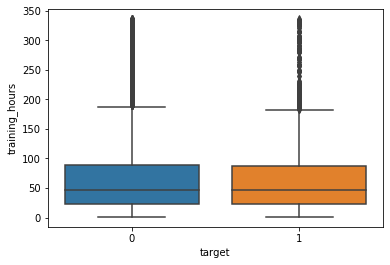

In [128]:
sns.boxplot(train['target'],train['training_hours'])

In [129]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [130]:
print("test : ",test.shape," train :",train.shape," submission :",submission.shape)

test :  (15021, 13)  train : (18359, 14)  submission : (15021, 2)


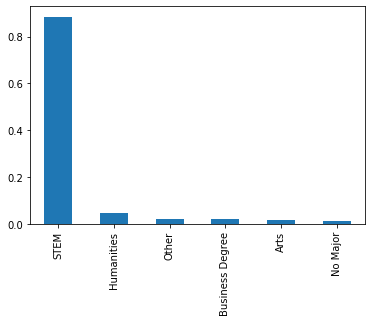

In [131]:
train.major_discipline.value_counts(normalize = True).plot(kind = 'bar')

In [132]:
def encode_categorical(df):
    for col in df.columns:
        if df[col].dtype =='object':
            le = LabelEncoder()
            not_null = df[col][df[col].notnull()]
            df[col] = pd.Series(le.fit_transform(not_null), index=not_null.index)

    return df
train = encode_categorical(train)
test = encode_categorical(test)

In [133]:
print("test : ",test.shape," train :",train.shape," submission :",submission.shape)

test :  (15021, 13)  train : (18359, 14)  submission : (15021, 2)


In [134]:
# print("train :",len(train),"\nNull values in train :\n",train.isnull().sum())
# print("test :",len(test),"\nNull values in test :\n",test.isnull().sum())

In [135]:
train.drop('enrollee_id',axis = 1, inplace =True)
test.drop('enrollee_id',axis = 1, inplace =True)

In [136]:
train.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [137]:
X_dummi,Y_dummi = train.drop('target',axis=1), train['target']

In [138]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0,initial_strategy = 'most_frequent')
check = pd.DataFrame(imp.fit_transform(X_dummi),columns = X_dummi.columns)


In [139]:
test = pd.DataFrame(imp.transform(test),columns = test.columns)

In [23]:
# imputer = KNNImputer()
# train = imputer.fit_transform(train)
# test = imputer.fit_transform(test)
# print('Done')


In [25]:
# # to select k no. of best features from the available list of features 
# from sklearn.feature_selection import SelectKBest
# #using chi-square test
# from sklearn.feature_selection import chi2

# bestfeatures = SelectKBest(score_func=chi2, k=12)
# fit = bestfeatures.fit(X_dummi,Y_dummi)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)

In [26]:
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Features','Score']

In [27]:
# print(featureScores.nlargest(25,'Score')) 

In [140]:
X,Y = train.drop('target',axis=1), train['target']

In [141]:
train_x,test_x,train_y,test_y = train_test_split(check,Y_dummi,test_size = 0.2, random_state = 42)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm 

In [143]:
model = CatBoostClassifier(iterations=20,
                           depth=6,
                           learning_rate=0.01,
                           loss_function='Logloss',
                           verbose=True)
model.fit(train_x,train_y)
prediction = model.predict(test_x)


0:	learn: 0.6877043	total: 15.3ms	remaining: 291ms
1:	learn: 0.6824597	total: 30.5ms	remaining: 275ms
2:	learn: 0.6773105	total: 48.7ms	remaining: 276ms
3:	learn: 0.6722314	total: 60.3ms	remaining: 241ms
4:	learn: 0.6672269	total: 78.3ms	remaining: 235ms
5:	learn: 0.6623324	total: 86.4ms	remaining: 202ms
6:	learn: 0.6575445	total: 106ms	remaining: 197ms
7:	learn: 0.6528645	total: 115ms	remaining: 172ms
8:	learn: 0.6481960	total: 134ms	remaining: 164ms
9:	learn: 0.6436337	total: 144ms	remaining: 144ms
10:	learn: 0.6392012	total: 152ms	remaining: 124ms
11:	learn: 0.6348295	total: 160ms	remaining: 107ms
12:	learn: 0.6304853	total: 169ms	remaining: 91ms
13:	learn: 0.6263136	total: 177ms	remaining: 76ms
14:	learn: 0.6221562	total: 185ms	remaining: 61.8ms
15:	learn: 0.6180995	total: 193ms	remaining: 48.3ms
16:	learn: 0.6140763	total: 201ms	remaining: 35.5ms
17:	learn: 0.6101677	total: 209ms	remaining: 23.3ms
18:	learn: 0.6062898	total: 220ms	remaining: 11.6ms
19:	learn: 0.6024914	total: 249m

In [144]:
acc = roc_auc_score(test_y,prediction)
acc

0.5

In [ ]:
stop

In [ ]:
# def Normalization(data):
#     numerical_col = [col for col in data.columns if col not in(obj_col)]
#     for c in data.columns:
#         if c !='is_pass':
#             data[c] = (data[c]-data[c].mean())/(data[c].std())
    
# Normalization(X)
# Normalization(test)
# X

In [ ]:
#feature_selection = ['test_id','trainee_engagement_rating','program_id','difficulty_level','test_type','program_type','education','city_tier','is_handicapped']

In [ ]:
# test =test[feature_selection]
# X = X[feature_selection]

In [ ]:
X.shape

In [ ]:
#train['program_type'].value_counts().plot(kind = 'bar')

In [ ]:
train.describe()

In [145]:
model = CatBoostClassifier(iterations=20,
                           depth=6,
                           learning_rate=0.01,
                           loss_function='Logloss',
                           verbose=True)
model.fit(check,Y_dummi)
prediction = model.predict(test)


0:	learn: 0.6877157	total: 9.59ms	remaining: 182ms
1:	learn: 0.6824716	total: 22.8ms	remaining: 205ms
2:	learn: 0.6773438	total: 40.7ms	remaining: 231ms
3:	learn: 0.6722760	total: 49.2ms	remaining: 197ms
4:	learn: 0.6672643	total: 66.7ms	remaining: 200ms
5:	learn: 0.6623865	total: 76.3ms	remaining: 178ms
6:	learn: 0.6575955	total: 96.9ms	remaining: 180ms
7:	learn: 0.6529183	total: 108ms	remaining: 162ms
8:	learn: 0.6482537	total: 128ms	remaining: 156ms
9:	learn: 0.6437064	total: 138ms	remaining: 138ms
10:	learn: 0.6392513	total: 157ms	remaining: 129ms
11:	learn: 0.6348817	total: 167ms	remaining: 111ms
12:	learn: 0.6305546	total: 186ms	remaining: 100ms
13:	learn: 0.6263825	total: 198ms	remaining: 85ms
14:	learn: 0.6222454	total: 207ms	remaining: 69ms
15:	learn: 0.6181974	total: 230ms	remaining: 57.4ms
16:	learn: 0.6141918	total: 251ms	remaining: 44.2ms
17:	learn: 0.6103017	total: 267ms	remaining: 29.6ms
18:	learn: 0.6064490	total: 286ms	remaining: 15.1ms
19:	learn: 0.6026610	total: 304m

In [146]:
prediction.shape

(15021,)

In [ ]:
# model=Sequential()
# model.add(Dense(50,input_dim=14,activation='relu'))
# model.add(Dense(25,activation='relu'))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#model.fit(X,Y,batch_size=50,epochs=10,verbose=1,validation_split=0.1)

In [147]:
submission['target']=prediction

In [148]:
submission.to_csv('base.csv',index = False)

In [149]:
submission

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,0
3,5032,0
4,17599,0
5,19314,0
6,12365,0
7,22696,0
8,16083,0
9,33240,0
